In [1]:
################################################################################################################
# BIBLIOTECAS 
################################################################################################################
import pandas            as pd    # Biblioteca para trabajar con DataFrames
import numpy             as np    # Biblioteca para trabajar con àlgebra lineal
import matplotlib.pyplot as plt   # Biblioteca para realizar gràficas

from matplotlib.colors       import ListedColormap 
from sklearn.metrics         import accuracy_score, confusion_matrix
from sklearn.ensemble        import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
# https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

# Habilitamos las graficas en linea y desactivamos las advertencias
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

################################################################################################################
# LEEMOS LOS DATOS
################################################################################################################
datos = pd.read_csv("Social_Network_Ads.csv")
datos.rename( columns = {'User ID':'UserID'}, inplace = True )
print("\nDatos ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::")
datos.sample(n=5, random_state=0)


Datos ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


,UserID,Gender,Age,EstimatedSalary,Purchased
132,15725660,Male,30,87000,0
309,15652400,Female,38,50000,0
341,15776844,Male,35,75000,0
196,15738448,Female,30,79000,0
246,15638003,Female,35,50000,0


## Opción 1 :: KFold

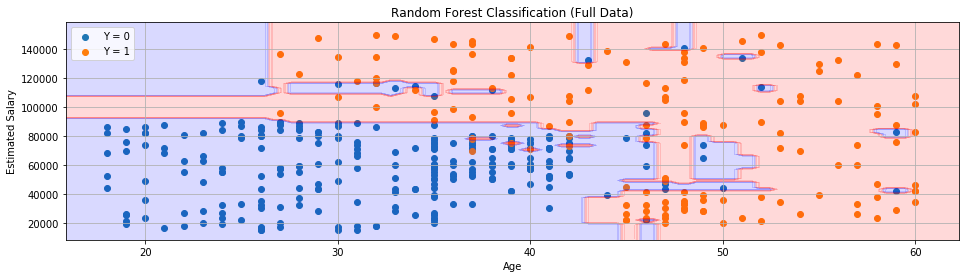

Precisión CV :: 0.8644465290806753
Precisiones  ::
[1.         0.7804878  0.90243902 0.875      0.925      0.85
 0.85       0.76923077 0.76923077 0.92307692]


In [6]:
################################################################################################################
# ENTRENAMOS NUESTRO MODELO
################################################################################################################
# Convertimos nuestros datos a nuestra matriz de diseño y vector de respuesta
X = datos.iloc[:, [2,3]]
y = datos.iloc[:, [4]]

# Generamos nuestro modelo con todos los datos
modelo_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
modelo_rf.fit(X, y)

################################################################################################################
# GRAFICA DE DATOS COMPLETOS
################################################################################################################
X_grafica, y_grafica = X.values, y.values.reshape( (y.values.shape[0],) )
# Iniciamos la grafica
plt.figure( figsize=(16,4) )
plt.title('Random Forest Classification (Full Data)')
# Graficamos los puntos de acuerdo a su clase
for y_valor in np.unique( y_grafica ):
    plt.scatter(X_grafica[y_grafica == y_valor,0], X_grafica[y_grafica == y_valor,1], label = "Y = " + str(y_valor) )
# Graficamos el fondo
X1, X2     = np.meshgrid( np.linspace(plt.gca().get_xlim()[0], plt.gca().get_xlim()[1], 100 ),
                          np.linspace(plt.gca().get_ylim()[0], plt.gca().get_ylim()[1], 100 ) )
YY         = modelo_rf.predict( np.vstack( [X1.ravel(), X2.ravel()] ).T ).reshape( X1.shape )
plt.contourf(X1, X2, YY , alpha=0.15, cmap = ListedColormap(('blue', 'red')) )
# Etiquetas y legenda
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.grid()
plt.show()

################################################################################################################
# METRICAS DEL MODELO
################################################################################################################
precision_cv = cross_val_score(estimator = modelo_rf, X = X, y = y, cv = 10)
print("Precisión CV ::", np.mean(precision_cv))
print("Precisiones  ::")
print(precision_cv)

## Opción 2 :: Subset Selectión


Grafica de Entrenamiento ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


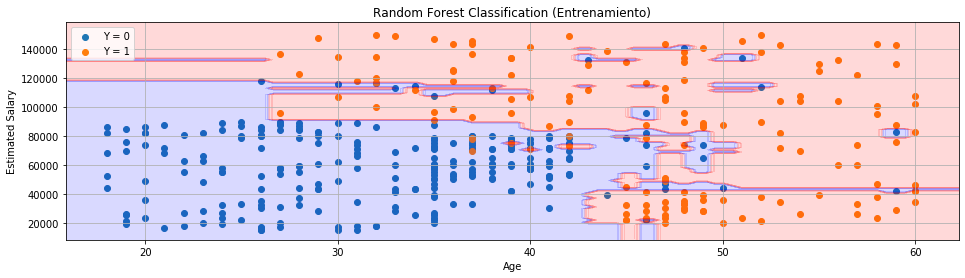


Grafica de Prueba :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


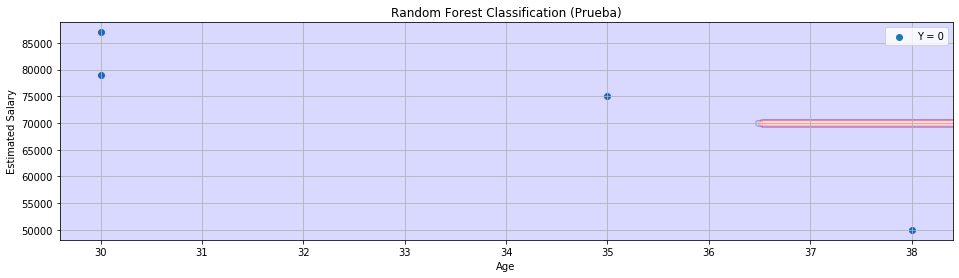


Matrices de Confusión ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
+ Entrenamiento
[[250   3]
 [  3 140]]

+ Prueba
[[4]]

Precisión (Entrenamiento) ::  0.9848484848484849
Precisión (Prueba)        ::  1.0


In [9]:
################################################################################################################
# ENTRENAMOS NUESTRO MODELO
################################################################################################################

# Convertimos nuestros datos a nuestra matriz de diseño y vector de respuesta
X = datos.iloc[:, [2,3]]
y = datos.iloc[:, [4]]

# Dividismos nuestros datos en Entrenamiento y Prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size = 0.01, random_state = 0)

# Generamos nuestro modelo de entrenamiento
modelo_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
modelo_rf.fit(X_entrenamiento, y_entrenamiento)

################################################################################################################
# GRAFICA DE DATOS DE ENTRENAMIENTO
################################################################################################################
print("\nGrafica de Entrenamiento ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::")

# Mostramos la predicción de Entrenamiento
X_grafica, y_grafica = X_entrenamiento.values, y_entrenamiento.values.reshape( (y_entrenamiento.values.shape[0],) )
# Iniciamos la grafica
plt.figure( figsize=(16,4) )
plt.title('Random Forest Classification (Entrenamiento)')
# Graficamos los puntos de acuerdo a su clase
for y_valor in np.unique( y_grafica ):
    plt.scatter(X_grafica[y_grafica == y_valor,0], X_grafica[y_grafica == y_valor,1], label = "Y = " + str(y_valor) )
# Graficamos el fondo
X1, X2     = np.meshgrid( np.linspace(plt.gca().get_xlim()[0], plt.gca().get_xlim()[1], 100 ),
                          np.linspace(plt.gca().get_ylim()[0], plt.gca().get_ylim()[1], 100 ) )
YY         = modelo_rf.predict( np.vstack( [X1.ravel(), X2.ravel()] ).T ).reshape( X1.shape )
plt.contourf(X1, X2, YY , alpha=0.15, cmap = ListedColormap(('blue', 'red')) )
# Etiquetas y legenda
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.grid()
plt.show()

################################################################################################################
# GRAFICA DE DATOS DE PRUEBA
################################################################################################################
print("\nGrafica de Prueba :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::")

# Mostramos la predicción de Prueba
X_grafica, y_grafica = X_prueba.values, y_prueba.values.reshape( (y_prueba.values.shape[0],) )
# Iniciamos la grafica
plt.figure( figsize=(16,4) )
plt.title('Random Forest Classification (Prueba)')
# Graficamos los puntos de acuerdo a su clase
for y_valor in np.unique( y_grafica ):
    plt.scatter(X_grafica[y_grafica == y_valor,0], X_grafica[y_grafica == y_valor,1], label = "Y = " + str(y_valor) )
# Graficamos el fondo
X1, X2     = np.meshgrid( np.linspace(plt.gca().get_xlim()[0], plt.gca().get_xlim()[1], 100 ),
                          np.linspace(plt.gca().get_ylim()[0], plt.gca().get_ylim()[1], 100 ) )
YY         = modelo_rf.predict( np.vstack( [X1.ravel(), X2.ravel()] ).T ).reshape( X1.shape )
plt.contourf(X1, X2, YY , alpha=0.15, cmap = ListedColormap(('blue', 'red')) )
# Etiquetas y legenda
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.grid()
plt.show()


################################################################################################################
# METRICAS DEL MODELO
################################################################################################################

# Estimamos nuestro vector de respuesta
y_estimada_entrenamiento = modelo_rf.predict(X_entrenamiento)
y_estimada_prueba        = modelo_rf.predict(X_prueba)

# Generamos nuestras matrices de confusion
print("\nMatrices de Confusión ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::")
print("+ Entrenamiento")
print( confusion_matrix(y_entrenamiento, y_estimada_entrenamiento) )
print("")
print("+ Prueba")
print( confusion_matrix(y_prueba, y_estimada_prueba) )
print("")
print("Precisión (Entrenamiento) :: ", accuracy_score(y_entrenamiento, y_estimada_entrenamiento) )
print("Precisión (Prueba)        :: ", accuracy_score(y_prueba, y_estimada_prueba) )

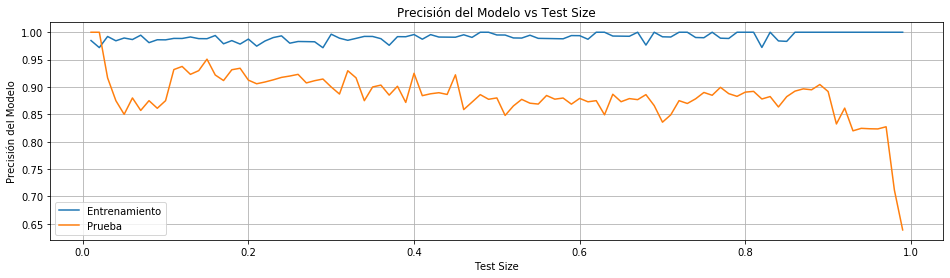

In [10]:
################################################################################################################
# CODIGO PARA VISUALIZAR LOS ERRORES
################################################################################################################
# Convertimos nuestros datos a nuestra matriz de diseño y vector de respuesta
X = datos.iloc[:, [2,3]]
y = datos.iloc[:, [4]]
# Tamaño de la particion, vector de precisiones para entrenamiento y de prueba
tam_particion        = 99
scores_entrenamiento = np.zeros( shape = (tam_particion,) )
scores_prueba        = np.zeros( shape = (tam_particion,) )
particion            = np.linspace(start=0.01, stop=0.99, num=tam_particion)
# Iteramos sobre la particion
for iteracion, test_size_iter in enumerate( particion ):
    # Dividismos nuestros datos en Entrenamiento y Prueba
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size = test_size_iter, random_state = 0)
    # Generamos nuestro modelo de entrenamiento
    modelo_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    modelo_rf.fit(X_entrenamiento, y_entrenamiento)
    # Estimamos nuestro vector de respuesta y calculamos la precisión
    scores_entrenamiento[iteracion] = accuracy_score( y_entrenamiento,  modelo_rf.predict(X_entrenamiento) )
    scores_prueba[iteracion]        = accuracy_score( y_prueba, modelo_rf.predict(X_prueba) )
# Iniciamos la grafica
plt.figure( figsize=(16,4) )
plt.title('Precisión del Modelo vs Test Size')
plt.plot(particion, scores_entrenamiento, label = "Entrenamiento")
plt.plot(particion, scores_prueba,        label = "Prueba")
plt.xlabel('Test Size')
plt.ylabel('Precisión del Modelo')
plt.legend()
plt.grid()
plt.show()

In [ ]:
################################################################################################################
# CODIGO PARA VISUALIZAR EL ERROR DEPENDIENDO DEL TAMAÑO DEL ARBOL
################################################################################################################
# Convertimos nuestros datos a nuestra matriz de diseño y vector de respuesta
X = datos.iloc[:, [2,3]].values
y = datos.iloc[:, [4]].values
# Tamaño de la particion, vector de precisiones para entrenamiento y de prueba
tam_particion = 50
scores_cv     = np.zeros( shape = (tam_particion,) )
particion     = np.linspace(start=10, stop=500, num=tam_particion).astype(np.int32)
# Iteramos sobre la particion
for iteracion, n_estimators_iter in enumerate( particion ):
    # Generamos nuestro modelo de entrenamiento
    modelo_rf = RandomForestClassifier(n_estimators = n_estimators_iter, criterion = 'entropy', random_state = 0).fit(X, y)
    scores_cv[iteracion] = np.mean( cross_val_score(estimator = modelo_rf, X = X, y = y, cv = 5) )
# Iniciamos la grafica
plt.figure( figsize=(16,4) )
plt.title('Precisión del Modelo vs Num de Árboles')
plt.plot(particion, scores_cv, label = "Accuracy del Modelo")
plt.xlabel('Número de Árboles')
plt.ylabel('Precisión del Modelo')
plt.legend()
plt.grid()
plt.show()

In [11]:
################################################################################################################
# CODIGO PARA VISUALIZAR EL ERROR DEPENDIENDO DEL TAMAÑO DEL ARBOL
################################################################################################################
# Convertimos nuestros datos a nuestra matriz de diseño y vector de respuesta
X = datos.iloc[:, [2,3]].values
y = datos.iloc[:, [4]].values
# Tamaño de la particion, vector de precisiones para entrenamiento y de prueba
tam_particion        = 50
scores_entrenamiento = np.zeros( shape = (tam_particion,) )
scores_prueba        = np.zeros( shape = (tam_particion,) )
particion            = np.linspace(start=10, stop=500, num=tam_particion).astype(np.int32)

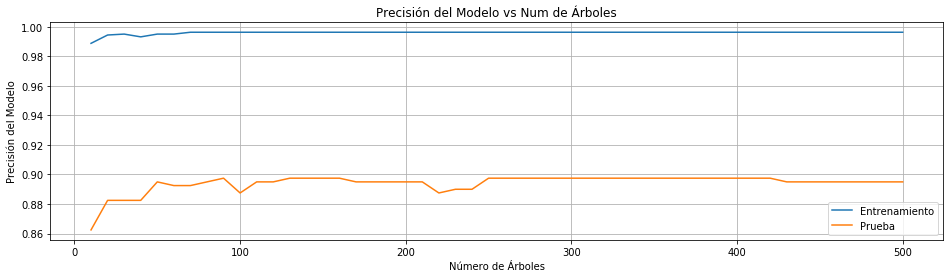

In [13]:
################################################################################################################
# CODIGO PARA VISUALIZAR EL ERROR DEPENDIENDO DEL TAMAÑO DEL ARBOL
################################################################################################################
# Convertimos nuestros datos a nuestra matriz de diseño y vector de respuesta
X = datos.iloc[:, [2,3]].values
y = datos.iloc[:, [4]].values
# Tamaño de la particion, vector de precisiones para entrenamiento y de prueba
tam_particion        = 50
scores_entrenamiento = np.zeros( shape = (tam_particion,) )
scores_prueba        = np.zeros( shape = (tam_particion,) )
particion            = np.linspace(start=10, stop=500, num=tam_particion).astype(np.int32)
# Iteramos sobre la particion
for iteracion, n_estimators_iter in enumerate( particion ):
    # Generamos nuestro modelo de entrenamiento
    score1_temp = list()
    score2_temp = list()
    objeto_kf = KFold(n_splits=5, shuffle=False, random_state=0)
    for indices_entrenamiento, indices_prueba in objeto_kf.split(X, y):
        X_entrenamiento, X_prueba = X[indices_entrenamiento], X[indices_prueba]
        y_entrenamiento, y_prueba = y[indices_entrenamiento], y[indices_prueba]
        modelo_rf = RandomForestClassifier(n_estimators = n_estimators_iter, criterion = 'entropy', random_state = 0)
        modelo_rf.fit( X_entrenamiento, y_entrenamiento )
        score1_temp.append( accuracy_score( y_entrenamiento, modelo_rf.predict(X_entrenamiento) ) )
        score2_temp.append( accuracy_score( y_prueba, modelo_rf.predict(X_prueba) ) )
    scores_entrenamiento[iteracion] = np.mean( score1_temp )
    scores_prueba[iteracion]        = np.mean( score2_temp )
# Iniciamos la grafica
plt.figure( figsize=(16,4) )
plt.title('Precisión del Modelo vs Num de Árboles')
plt.plot(particion, scores_entrenamiento, label = "Entrenamiento")
plt.plot(particion, scores_prueba,        label = "Prueba")
plt.xlabel('Número de Árboles')
plt.ylabel('Precisión del Modelo')
plt.legend()
plt.grid()
plt.show()